# Analysis of data of Moignard et al. (2015)

This has been published in Haghverdi et al., Nature Methods 13, 845 (2016) - there, a Matlab implementation was used.

In [1]:
from sys import path
path.insert(0,'..')
import numpy as np
import scanpy as sc

# set very low png resolution, to decrease storage space
sc.sett.dpi(30)
# show some output
sc.sett.verbosity = 1

In [2]:
def moignard15_raw():
    """                                                                                                                                                                              
    1. Filter out a few genes.                                                                                                                                                       
    2. Choose 'root cell'.                                                                                                                                                           
    3. Define groupnames by inspecting cellnames.                                                                                                                                    
    """
    filename = 'data/moignard15/nbt.3154-S3.xlsx'
    url = 'http://www.nature.com/nbt/journal/v33/n3/extref/nbt.3154-S3.xlsx'
    ddata = sc.read(filename, sheet='dCt_values.txt', backup_url=url)
    X = ddata['X'] # data matrix                                                                                                                                                     
    genenames = ddata['colnames']
    cellnames = ddata['rownames']
    # filter genes                                                                                                                                                                   
    # filter out the 4th column (Eif2b1), the 31nd (Mrpl19), the 36th                                                                                                                
    # (Polr2a) and the 45th (last,UBC), as done by Haghverdi et al. (2016)                                                                                                           
    genes = np.r_[np.arange(0,4),np.arange(5,31),np.arange(32,36),np.arange(37,45)]
    # print('selected', len(genes), 'genes')
    ddata['X'] = X[:, genes] # filter data matrix                                                                                                                                    
    ddata['colnames'] = genenames[genes] # filter genenames                                                                                                                          
    # choose root cell as in Haghverdi et al. (2016)                                                                                                                                 
    ddata['xroot'] = ddata['X'][532] # note that in Matlab/R, counting starts at 1                                                                                                   
    # defne groupnames and groupnames_n                                                                                                                                              
    # coloring according to Moignard et al. (2015) experimental cell groups                                                                                                          
    groupnames = np.array(['HF', 'NP', 'PS', '4SG', '4SFG'])
    groupnames_n = [] # a list with n entries (one for each sample)                                                                                                                  
    for name in cellnames:
        for groupname in groupnames:
            if name.startswith(groupname):
                groupnames_n.append(groupname)
    ddata['groupnames_n'] = groupnames_n
    ddata['groupnames'] = groupnames
    # custom colors for each group                                                                                                                                                   
    groupcolors = np.array(['#D7A83E', '#7AAE5D', '#497ABC', '#AF353A', '#765099'])
    ddata['groupcolors'] = groupcolors
    return ddata

In [3]:
# load data dictionary
ddata = moignard15_raw() # ddata = sc.example('moignard15_raw')
ddata = sc.subsample(ddata, 5)
# perform DPT analysis
ddpt = sc.dpt(ddata)

reading file ../data/moignard15/nbt.3154-S3.h5
subsampled to 787 of 3934 data points
computing Diffusion Map with method "local"
0:00:00.527 - computed distance matrix with metric = sqeuclidean
0:00:00.012 - determined k = 5 nearest neighbors of each point
0:00:00.049 - computed W (weight matrix) with "knn" = False
0:00:00.005 - computed K (anisotropic kernel)
0:00:00.015 - computed Ktilde (normalized anistropic kernel)
0:00:00.154 - computed Ktilde's eigenvalues:
[ 1.                0.98827710168267  0.95478007177799  0.82124547396644
  0.77235915772496  0.7461081691426   0.66023847141885  0.62801311818493
  0.61945974353947  0.61397984513027]
perform Diffusion Pseudotime Analysis
0:00:00.102 - computed M matrix
0:00:00.374 - computed Ddiff distance matrix
detect 1 branchings
tip points [675 284 498] = [third start end]
0:00:00.117 - finished branching detection


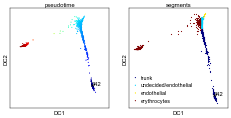

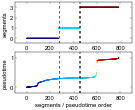

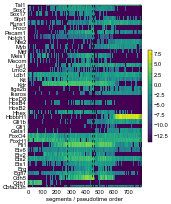

In [4]:
ddpt['groupnames'] = ['trunk', 'undecided/endothelial', 'endothelial', 'erythrocytes']
sc.plot(ddpt, ddata, legendloc='lower left')